# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [14]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

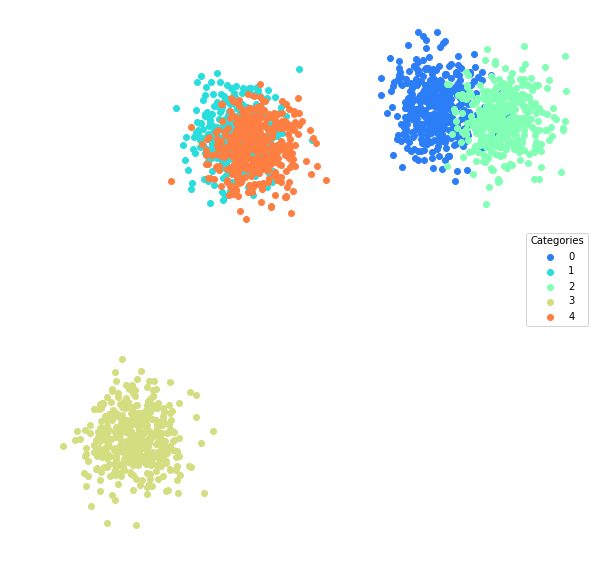

In [15]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [16]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [17]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [18]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.020,0.983750,0.916667,0.909500,0.990000
1,0.146,0.766448,0.628866,0.465437,0.622449
2,0.020,0.955468,0.989583,0.921946,0.913462
3,0.000,1.000000,1.000000,1.000000,1.000000
4,0.146,0.778643,0.644231,0.491063,0.650485


This lets us look at which classes do better:

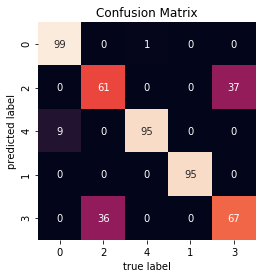

In [19]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

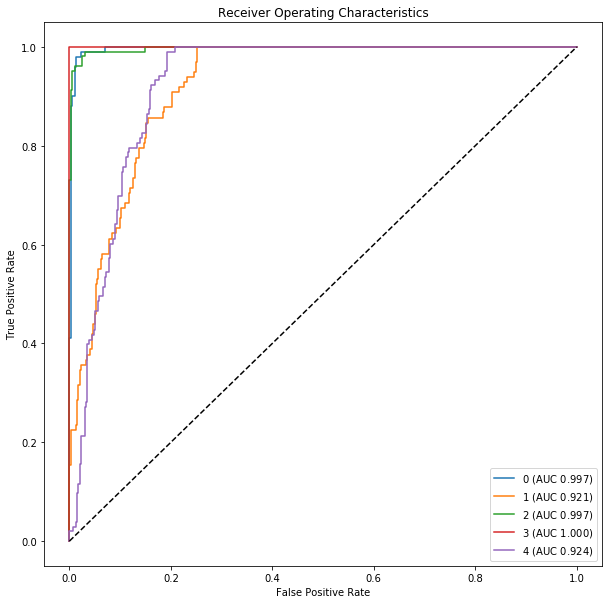

In [20]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

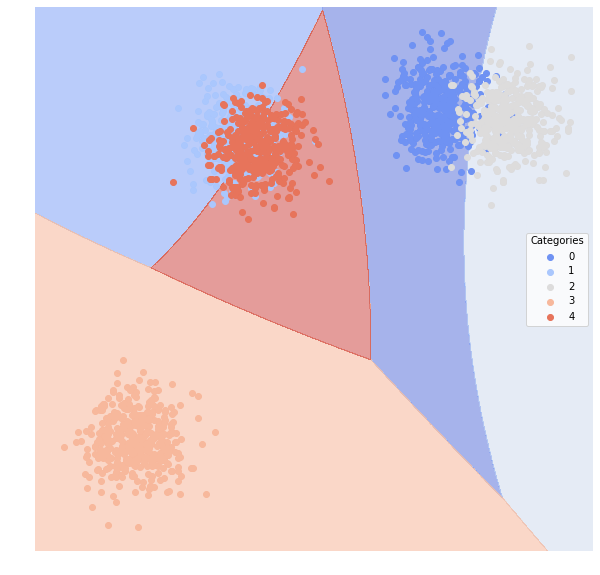

In [21]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [22]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


In [23]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [24]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Relationships,0.178683,0.686642,0.733333,0.451322,0.423077
Weeaboo Tales,0.210031,0.837883,0.566434,0.549175,0.941860
Bad Roommates,0.128527,0.808439,0.771429,0.605676,0.683544
Tales From Tech Support,0.059561,0.884043,0.967213,0.804154,0.776316


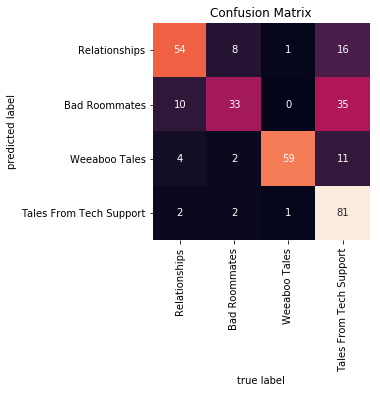

In [26]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

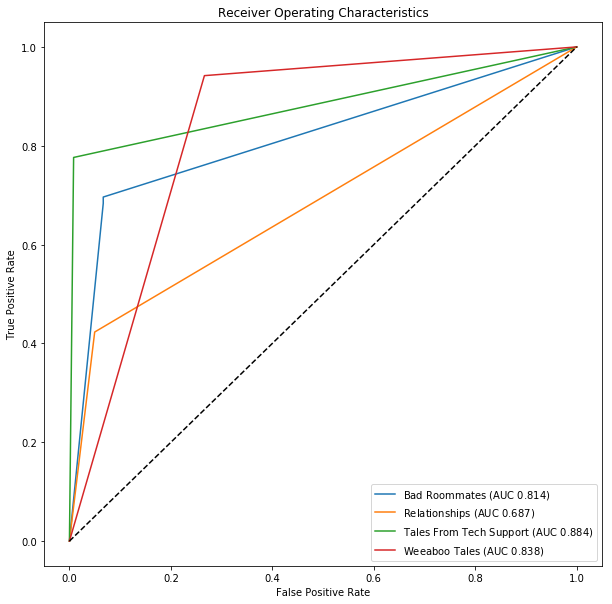

In [27]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

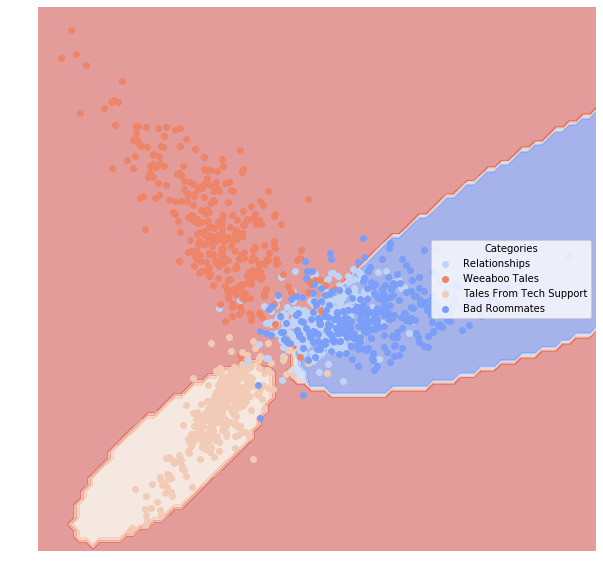

In [28]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

### Artificial Datasets

In [142]:
# generate 10 distinct artificial datasets
random.seed(100)

noise_1 = .2
noise_2 = .5
noise_3 = .8

dfTrain_1, dfTest_1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
dfTrain_2, dfTest_2 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise_1))
dfTrain_3, dfTest_3 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise_1))
dfTrain_4, dfTest_4 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise_1))
dfTrain_5, dfTest_5 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise_1))
dfTrain_6, dfTest_6 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise_3))
dfTrain_7, dfTest_7 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise_3))
dfTrain_8, dfTest_8 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise_3))
dfTrain_9, dfTest_9 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise_3))
dfTrain_10, dfTest_10 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise_2))

train_lst = [dfTrain_1, dfTrain_2, dfTrain_3, dfTrain_4, dfTrain_5, dfTrain_6, dfTrain_7, dfTrain_8, dfTrain_9, dfTrain_10]
test_lst = [dfTest_1, dfTest_2, dfTest_3, dfTest_4, dfTest_5, dfTest_6, dfTest_7, dfTest_8, dfTest_9, dfTest_10]




In [143]:
# Prepare the models

#Bayes
NB = sklearn.naive_bayes.GaussianNB()

#Analogizes
SVM_l = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
SVM_p = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
KNN = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
LR = sklearn.linear_model.LogisticRegression()

#Symbolists
DT = sklearn.tree.DecisionTreeClassifier()
RF = sklearn.ensemble.RandomForestClassifier()

#Connectionists
NN = sklearn.neural_network.MLPClassifier()

#Ensemble
ENS = sklearn.ensemble.GradientBoostingClassifier()

In [144]:
# fit all models for each dataset and calculate the average error rate & AUC for all categories in each dataset
model_names = ['Naive Bayes', 'SVM Linear', 'SVM Poly', 'KNN', 'Logistic Regression', 'Decision Tree', 
              'Random Forest', 'Neural Network', 'Ensemble']
eva_df_lst = []
for i, dfTrain in enumerate(train_lst):
    eva_df = pandas.DataFrame({'model': [], 'average error rate' : [], 'average AUC': []})
    for j, model in enumerate([NB, SVM_l, SVM_p, KNN, LR, DT, RF, NN, ENS]):
        model.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        df = lucem_illud_2020.evaluateClassifier(model, test_lst[i])
        eva_df = eva_df.append({'model': model_names[j], 'average error rate': df["Error_Rate"].mean(), 
                       'average AUC': df["AUC"].mean()}, ignore_index=True)
    eva_df.set_index('model',inplace=True)
    eva_df_lst.append(eva_df)

/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


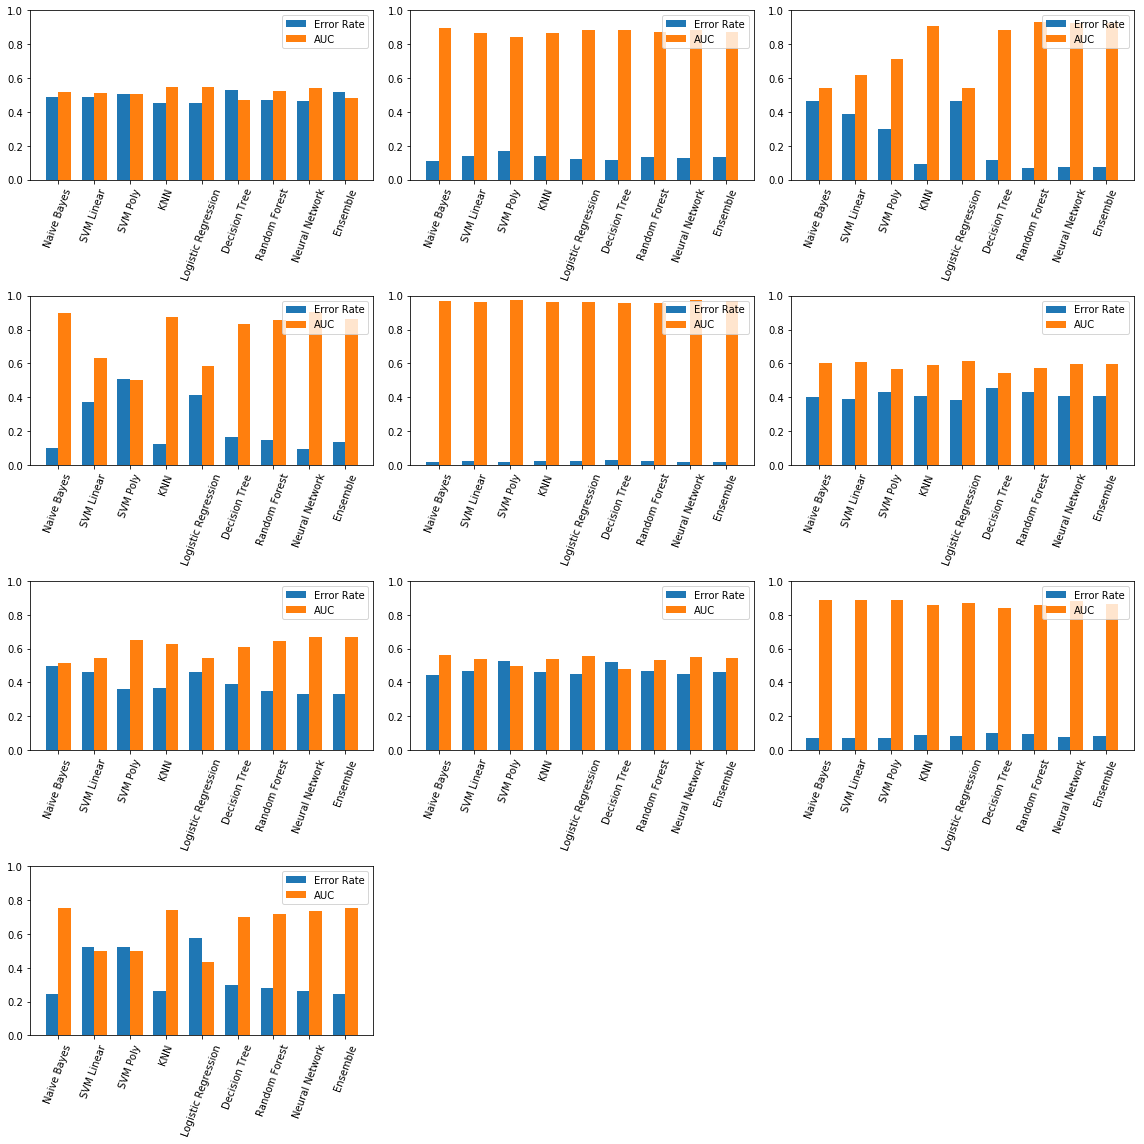

In [154]:
# plot the error rate and auc
fig = plt.figure(figsize=(16, 16))
ind = np.arange(9)  # the x locations for the groups
width = 0.35  # the width of the bars
n=0

for df in eva_df_lst:
    n+=1
    ax = fig.add_subplot(4,3,n)
    rects1 = ax.bar(ind - width/2, df['average error rate'], width, label='Error Rate')
    rects2 = ax.bar(ind + width/2, df['average AUC'], width, label='AUC')
    ax.set_ylim([0.0,1.0])
    ax.set_xticks(ind)
    ax.set_xticklabels((df.index), 
                   fontsize=10, rotation=70)
    ax.legend(fontsize=10, loc=1)
    plt.tight_layout()

Among the ten diagnostic graphs above, the first one corresponds to a dataset in which the two classes are randomly distributed across both dimensions. The second, third, fourth, and fifth correspond to four datasets with low noises (0.2): a dataset in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas); a dataset in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes); a dataset in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs); a dataset in which 5 classes are placed as bivariate Gaussians at random locations. The sixth, seventh, eighth, and ninth correspond to the same four types of dataset with higher noises (0.8). The last graph is based on a nested class dataset with 0.5 noise.
<br>
<br>
Generally, the classifiers all work very poorly on the randomly distributed data (the first one) and all the data with high noises (0.8) except for the one in which 5 classes are placed as bivariate Gaussians at random locations (the 9th one). This finding is intutive as when there's more randomness involved, it is harder to classify (Except that the randomness of the 9th one is the location of clusters rather than indiviudal data points).
<br>
<br>
Among the datasets that are generally better classified than the ones I just discussed, logistic regression performs the best on the linear split (the 2nd) as it suits the linear situation better. For the datasets with 5 classes placed as bivariate Gaussians at random locations (the fifth and ninth), every classifier works almost equally well and much better than the performance of these models on the other datasets, as the way the data were generated make the classification task easier. For rest data in which classes are distributed nonlineraly (the 3rd, 4th and 10th), random forest, neural network and ensemble works better than the other models as they are better at capturing more complex distribution of classes. 

### Empirical Dataset

In [155]:
# load the data
dic_train_data = {}
dic_test_data = {}

dic_train_data["Reddit"], dic_test_data["Reddit"] = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
dic_train_data["News"], dic_test_data["News"] = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
dic_train_data["SenateSmall"], dic_test_data["SenateSmall"] = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
dic_train_data["SenateLarge"], dic_test_data["SenateLarge"] = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
dic_train_data["Spam"], dic_test_data["Spam"] = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [156]:
# Prepare the models

#Bayes
NB = sklearn.naive_bayes.GaussianNB()

#Analogizes
SVM_l = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
SVM_p = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
KNN = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
LR = sklearn.linear_model.LogisticRegression()

#Symbolists
DT = sklearn.tree.DecisionTreeClassifier()
RF = sklearn.ensemble.RandomForestClassifier()

#Connectionists
NN = sklearn.neural_network.MLPClassifier()

#Ensemble
ENS = sklearn.ensemble.GradientBoostingClassifier()

In [157]:
# fit all models for each dataset and calculate the average error rate & AUC for all categories in each dataset
model_names = ['Naive Bayes', 'SVM Linear', 'SVM Poly', 'KNN', 'Logistic Regression', 'Decision Tree', 
              'Random Forest', 'Neural Network', 'Ensemble']
eva_df_lst = []
for dfTrain in dic_train_data:
    eva_df = pandas.DataFrame({'model': [], 'average error rate' : [], 'average AUC': []})
    for j, model in enumerate([NB, SVM_l, SVM_p, KNN, LR, DT, RF, NN, ENS]):
        model.fit(np.stack(dic_train_data[dfTrain]['vect'], axis=0), dic_train_data[dfTrain]['category'])
        df = lucem_illud_2020.evaluateClassifier(model, dic_test_data[dfTrain])
        eva_df = eva_df.append({'model': model_names[j], 'average error rate': df["Error_Rate"].mean(), 
                       'average AUC': df["AUC"].mean()}, ignore_index=True)
    eva_df.set_index('model',inplace=True)
    eva_df_lst.append(eva_df)

/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ditong/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ditong/anaconda3/lib/python3.7/site-packa

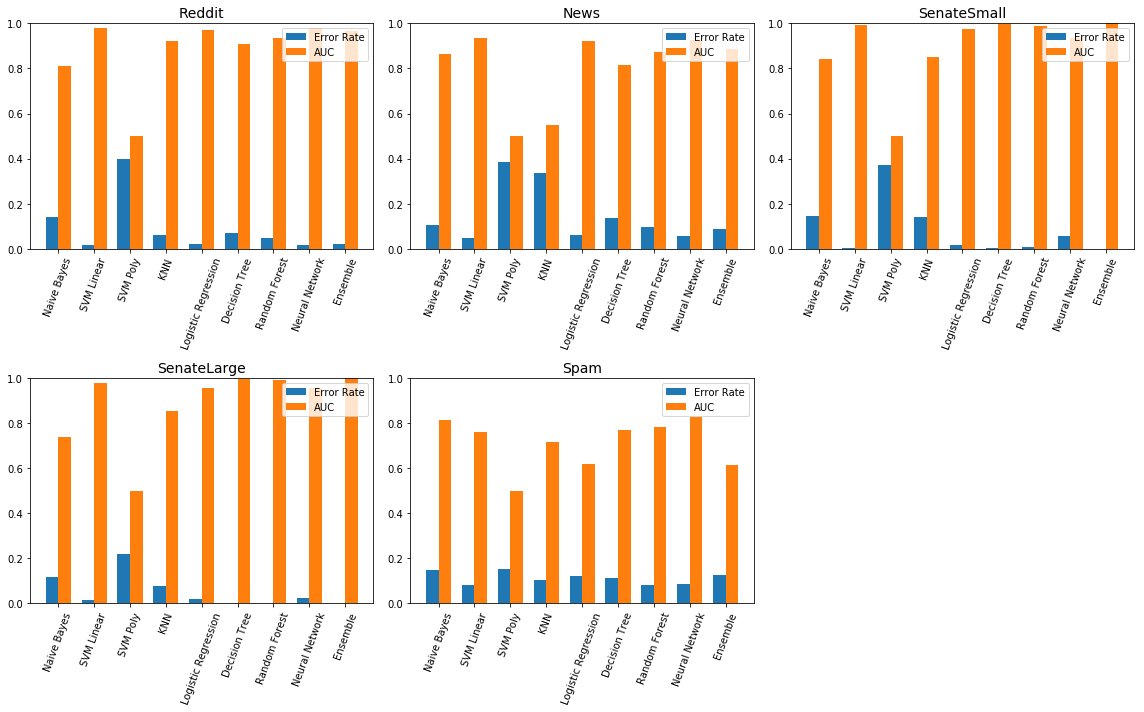

In [184]:
# plot the error rate and auc
fig = plt.figure(figsize=(16, 10))
ind = np.arange(9)  # the x locations for the groups
width = 0.35  # the width of the bars
n=0

for df in eva_df_lst:
    n+=1
    ax = fig.add_subplot(2,3,n)
    rects1 = ax.bar(ind - width/2, df['average error rate'], width, label='Error Rate')
    rects2 = ax.bar(ind + width/2, df['average AUC'], width, label='AUC')
    ax.set_ylim([0.0,1.0])
    ax.set_xticks(ind)
    ax.set_xticklabels((df.index), 
                   fontsize=10, rotation=70)
    plt.title(list(dic_train_data.keys())[n-1], fontsize=14)
    ax.legend(fontsize=10, loc=1)
    plt.tight_layout()

For data with clearly distingushiable clusters (Reddit, News, Senate small), SVM Linear and Logistic Regression works best (though neural network, ensemble (gradient boosting), decision tree and random forest works equally well for some), for these data can be classified well with relatively simpler models. For Senate Large and Spam, which have more varied classes with more overlapping between each, more complicated models such as random forest, ensemble (gradient boosting) and neural network perform better.
<br>

### Stretch: Adaboost

In [437]:
# Fit Adaboost to the second generated dataset (linear split with low noise) and the senate large data
train_lst = [dfTrain_2, dic_train_data["SenateLarge"]]
test_lst = [dfTest_2, dic_test_data["SenateLarge"]]
data_name = ['linear split', 'senate large']


eva_df = pandas.DataFrame({'data': [], 'average error rate' : [], 'average AUC': []})
for i, dfTrain in enumerate(train_lst):    
    model = sklearn.ensemble.AdaBoostClassifier()
    model.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    df = lucem_illud_2020.evaluateClassifier(model, test_lst[i])
    eva_df = eva_df.append({'data': data_name[i], 'average error rate': df["Error_Rate"].mean(), 
                   'average AUC': df["AUC"].mean()}, ignore_index=True)
eva_df.set_index('data',inplace=True)

In [438]:
eva_df

,average error rate,average AUC
data,,
linear split,0.120000,0.881871
senate large,0.001538,0.996122


For the generated dataset (a linear split between two classes with low noise), adaboost does not perform better than naive bayes and decision tree, for these simpler models are adequete to distingush to linearly splitted binary classes. For the senate large dataset, which involves multiple classes with less clear distinction between each, adaboost perform similar to random forest and ensemble (gradient boosting), which are the best classifiers, as they are all ensemble methods that deal with more complicated tasks.   

<br><br><br>

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [29]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [30]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [31]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [32]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [33]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [34]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [35]:
TFVects.shape

(1368, 11368)

We can save this in the dataframe to make things easier

In [36]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [37]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [38]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


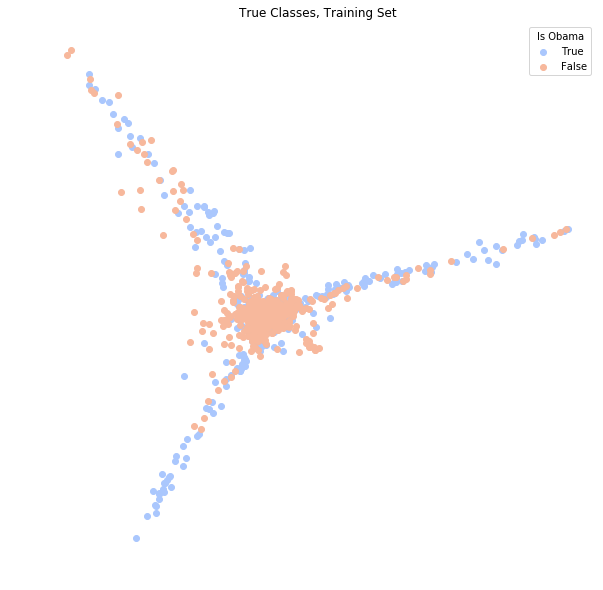

In [39]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

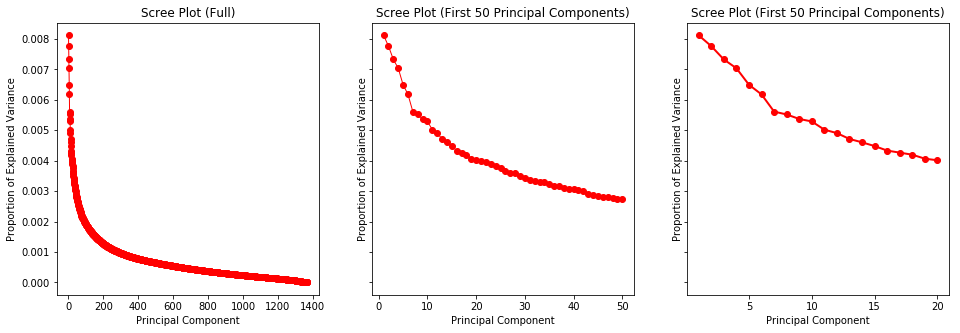

In [40]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [41]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [42]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [43]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6681286549707602

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [44]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6392961876832844

Slightly poorer. How about using more dimensions (40)?

In [45]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7353801169590644
Testing:
0.7126099706744868


Or still more (100)?

In [46]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8326023391812866
Testing:
0.7741935483870968


Or even more (200)!

In [47]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8728070175438597
Testing:
0.8181818181818182


This is becoming ridiculous (400)!

In [48]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9159356725146199
Testing:
0.8269794721407625


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [49]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9612573099415205


Train the model using training data, and then test it on the testing data.

In [50]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8328445747800587


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [51]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [52]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9707602339181286
Testing:
0.8914956011730205


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [53]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [54]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8472222222222222

Recall:

In [55]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.8905109489051095

F1-measure:

In [56]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8683274021352312

Let's take a look at how well our posterior distribution looks relative to the truth.

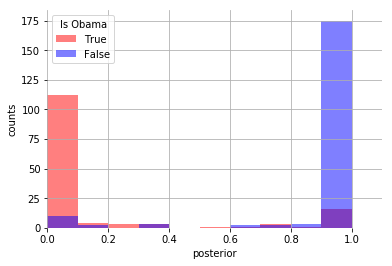

In [57]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [58]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.191033,labolt,-1.725239
1,announcement,-2.272002,amy,-1.776011
2,welcomed,-2.284123,friday,-1.797065
3,island,-2.308816,brundage,-1.863022
4,fy,-2.321394,dick,-1.897708
5,urging,-2.360109,chicago,-2.077679
6,environment,-2.428162,temporary,-2.135667
7,urban,-2.428162,location,-2.213225
8,entire,-2.442347,reform,-2.229485
9,read,-2.442347,va,-2.297308


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [59]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [60]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [61]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [62]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [63]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [64]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [65]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [66]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8920487521764364


In [67]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
89,talk.religion.misc,talk.religion.misc
274,talk.religion.misc,soc.religion.christian
56,talk.religion.misc,talk.religion.misc
1157,sci.space,sci.space
1251,sci.space,sci.space
786,soc.religion.christian,soc.religion.christian
2144,comp.graphics,comp.graphics
2120,comp.graphics,comp.graphics
1641,comp.graphics,comp.graphics
1623,comp.graphics,comp.graphics


Looks pretty good, lets examine the testing dataset:

In [68]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.8069767441860465


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

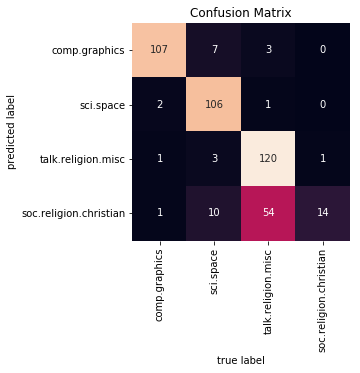

In [69]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [70]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_scoretest_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

0.9246119964015463
0.8069767441860465
0.8449080924394947


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [71]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.146512,0.884918,0.674157,0.658819,0.960000
talk.religion.misc,0.153488,0.587183,0.933333,0.316564,0.177215
sci.space,0.053488,0.955086,0.841270,0.825092,0.972477
comp.graphics,0.032558,0.950875,0.963964,0.904830,0.914530


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

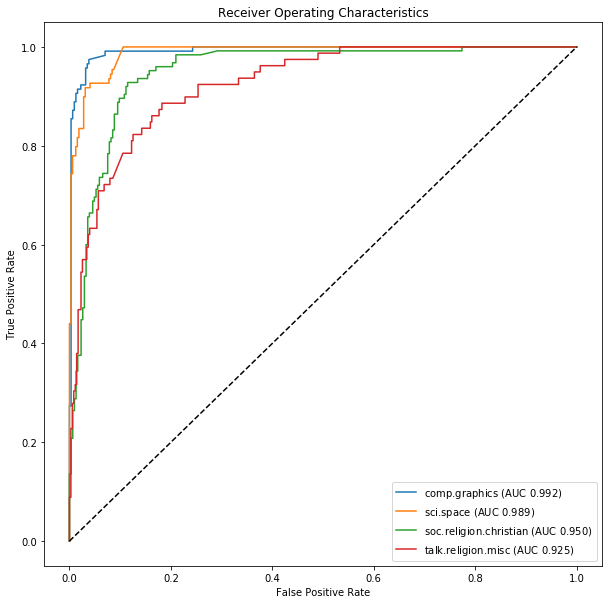

In [72]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

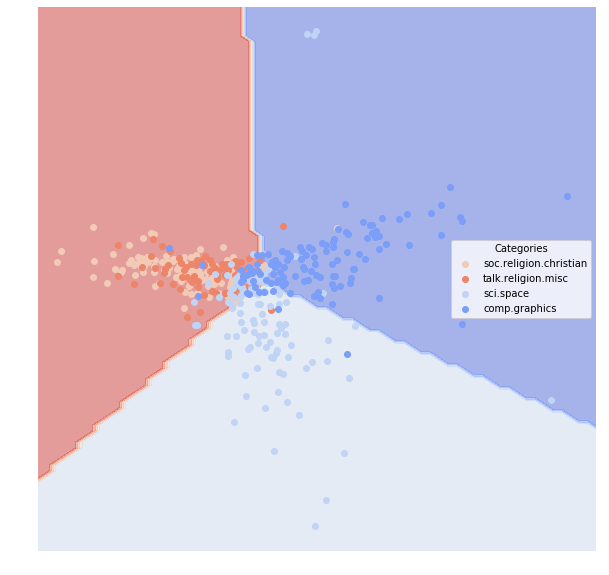

In [73]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


### Preprocessing

In [378]:
# read in data
StackOverFlow = pandas.read_csv('/Users/ditong/Documents/comp content analysis/Content-Analysis-2020/week-3/stack-overflow-data.csv')
# generate binary tag for posts: mobile device languages vs non-mobile-device languages
StackOverFlow['category'] = [s in ['android', 'ios', 'iphone'] for s in StackOverFlow['tags']]
# only keep the first 8000 posts
Data_SOF = StackOverFlow[:8000]
# only keep several languages
languages = ['android', 'ios', 'iphone', 'c', 'html', 'java', 'python', 'sql']
Data_SOF_sub_all = Data_SOF[Data_SOF.tags.isin(languages)]

In [379]:
# preprocessing
Data_SOF_sub_all['tokenized_text'] = Data_SOF_sub_all['post'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
Data_SOF_sub_all['normalized_text'] = Data_SOF_sub_all['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

/Users/ditong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ditong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [380]:
Data_SOF_sub_all.head()

,post,tags,category,tokenized_text,normalized_text
4,trying to calculate and print the mean and its...,python,False,"[trying, to, calculate, and, print, the, mean,...","[try, calculate, print, mean, returning, <, fu..."
7,identifying server timeout quickly in iphone ...,iphone,True,"[identifying, server, timeout, quickly, in, ip...","[identify, server, timeout, quickly, iphone, c..."
11,how to install .ipa on jailbroken iphone over ...,ios,True,"[how, to, install, .ipa, on, jailbroken, iphon...","[install, .ipa, jailbroken, iphone, air, apple..."
13,rather than bubblesorting these names...the pr...,c,False,"[rather, than, bubblesorting, these, names, th...","[bubblesorte, name, program, crash, clearly, w..."
18,distance between 2 or more drop pins i was do...,iphone,True,"[distance, between, 2, or, more, drop, pins, i...","[distance, drop, pin, small, assignment, find,..."


In [381]:
# create an uncoded holdout set for extrapolation (though actually coded)
uncoded_df = Data_SOF_sub_all[2001:]
uncoded_df = uncoded_df.drop(['category'], axis=1)
coded_df = Data_SOF_sub_all[:2000]

# split the coded data
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(coded_df, holdBackFraction=holdBackFraction)
print(len(train_data_df))
print(len(test_data_df))

1600
400


### Logistic Regression

In [382]:
# turn the training dataset into a tf-idf matrix
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['post'])
# view the shape
TFVects.shape

(1600, 4918)

In [383]:
# store the vectors in df
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
# turn the test dataset into a tf-idf matrix, store the vectors in df
TFVects_test = TFVectorizer.transform(test_data_df['post'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

In [384]:
# To avoid overfitting with too many covariates, train a logistic regression that uses the TF-IDF scores 
# for each word, but with an L1 regularization or L1-norm loss function, which retains only the most 
# individually significant features; test the model on the test dataset
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print("training accuracy score",logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("testing accuracy score",logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))
# store the predictions for the test set and add to df
test_data_df['lr_predict'] = logistic_l1.predict(np.stack(test_data_df['vect'], axis=0))

training accuracy score 0.963125
testing accuracy score 0.8925


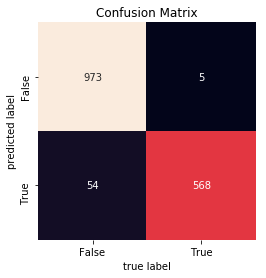

In [385]:
# Visualize the confusion matrix for the training set
lucem_illud_2020.plotConfusionMatrix(logistic_l1, train_data_df)

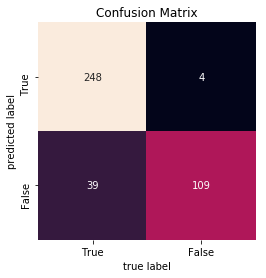

In [386]:
# Visualize the confusion matrix for the testing set
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

In [387]:
# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_data_df['category'], test_data_df['lr_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_data_df['category'], test_data_df['lr_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_data_df['category'], test_data_df['lr_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_data_df['category'], test_data_df['lr_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.9012928987696956
Recall:  0.8925
F measure: 0.8887824053341294
AUC: 0.8603067353067353


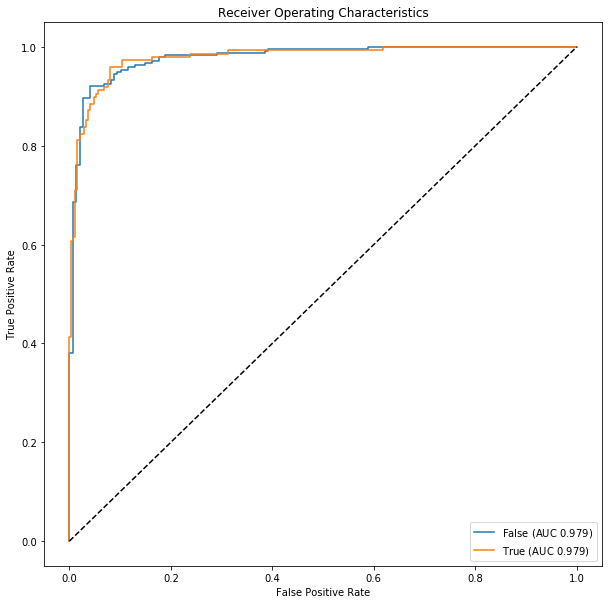

In [388]:
# perform an ROC visualization
lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

In [390]:
# Exrapolate codes from these models to all uncoded data

# turn the uncoded dataset into a tf-idf matrix, store the vectors in df
TFVects_test = TFVectorizer.transform(uncoded_df['post'])
uncoded_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
# store the predicted labels
uncoded_df['lr_predict'] = logistic_l1.predict(np.stack(uncoded_df['vect'], axis=0))
uncoded_df.head()

,post,tags,tokenized_text,normalized_text,vect,lr_predict
5105,why don t we use <script src= xyz /> in html5...,html,"[why, don, t, we, use, <, script, src=, xyz, >...","[don, t, use, <, script, src=, xyz, >, html5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
5106,what is the difference between pass by referen...,java,"[what, is, the, difference, between, pass, by,...","[difference, pass, reference, reference, diffe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
5116,block call on sony ericsson phones im trying ...,android,"[block, call, on, sony, ericsson, phones, i, m...","[block, sony, ericsson, phones, m, try, write,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
5117,problems accessing local and remote files on a...,android,"[problems, accessing, local, and, remote, file...","[problem, access, local, remote, file, android...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
5120,after uploading to server images not showing i...,html,"[after, uploading, to, server, images, not, sh...","[upload, server, image, show, web, browser, ht...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False


### Naive Bayes

In [391]:
# perform Naïve Bayes classification using training and testing data
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print("training accuracy score", naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("testing accuracy score", naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))

training accuracy score 0.915
testing accuracy score 0.8675


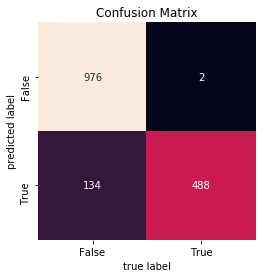

In [392]:
# Visualize the confusion matrix for the training set
lucem_illud_2020.plotConfusionMatrix(naiveBayes, train_data_df)

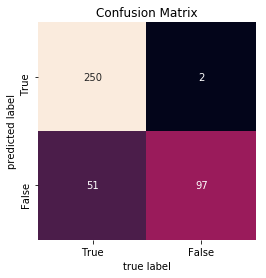

In [393]:
# Visualize the confusion matrix for the testing set
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_data_df)

In [394]:
# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_data_df['category'], test_data_df['nb_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.8857810664787408
Recall:  0.8675
F measure: 0.8602275406139498
AUC: 0.8237344487344487


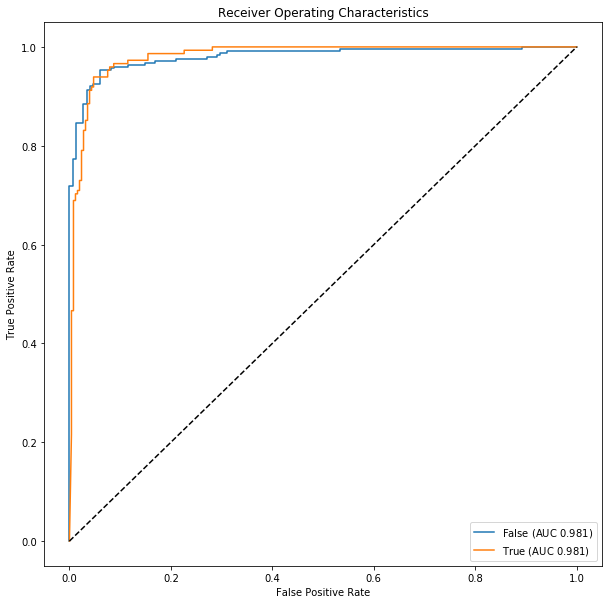

In [395]:
# perform an ROC visualization
lucem_illud_2020.plotMultiROC(naiveBayes, test_data_df)

Both logistic regreesion and naive bayes do not perform well with their F1 MEASURE and AUC all below 0.9. Logistic regression perform slightly better with larger f1 measure, auc, precision and recall than that of naive bayes.
<br>

In [396]:
# Exrapolate codes from these models to all uncoded data

# turn the uncoded dataset into a tf-idf matrix, store the vectors in df
TFVects_test = TFVectorizer.transform(uncoded_df['post'])
uncoded_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
# store the predicted labels
uncoded_df['nb_predict'] = naiveBayes.predict(np.stack(uncoded_df['vect'], axis=0))
uncoded_df.head()

,post,tags,tokenized_text,normalized_text,vect,lr_predict,nb_predict
5105,why don t we use <script src= xyz /> in html5...,html,"[why, don, t, we, use, <, script, src=, xyz, >...","[don, t, use, <, script, src=, xyz, >, html5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False
5106,what is the difference between pass by referen...,java,"[what, is, the, difference, between, pass, by,...","[difference, pass, reference, reference, diffe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False
5116,block call on sony ericsson phones im trying ...,android,"[block, call, on, sony, ericsson, phones, i, m...","[block, sony, ericsson, phones, m, try, write,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True
5117,problems accessing local and remote files on a...,android,"[problems, accessing, local, and, remote, file...","[problem, access, local, remote, file, android...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True
5120,after uploading to server images not showing i...,html,"[after, uploading, to, server, images, not, sh...","[upload, server, image, show, web, browser, ht...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False


<br><br><br>

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

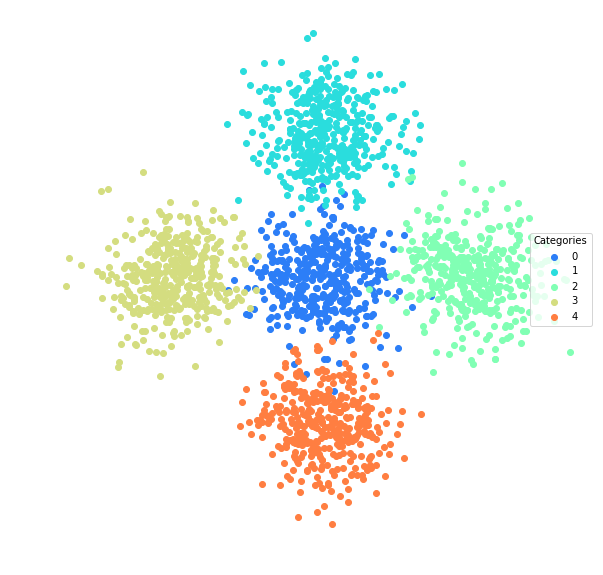

In [185]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [186]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

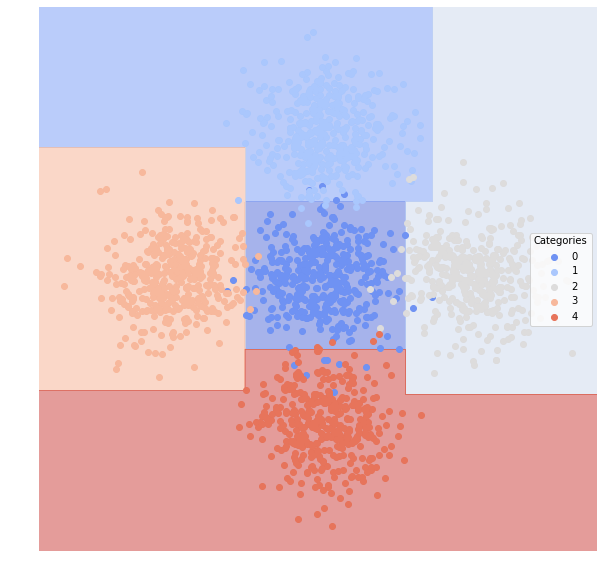

In [187]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [188]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.024,0.963578,0.942308,0.899944,0.942308
1,0.002,0.998771,0.989362,0.989362,1.000000
2,0.004,0.993703,0.989899,0.981900,0.989899
3,0.006,0.988130,0.989247,0.972199,0.978723
4,0.012,0.982517,0.972727,0.952198,0.972727


Lets look at accuracy:

In [189]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.976

What happens if we trim the tree?

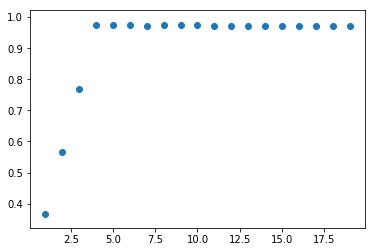

In [190]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [191]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [192]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

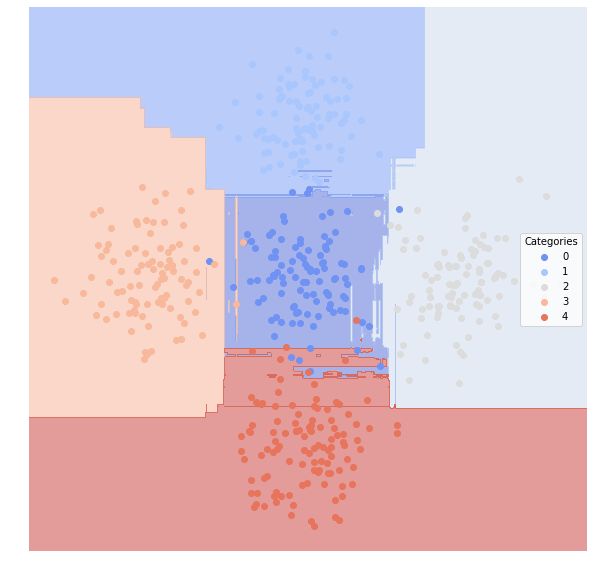

In [193]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [194]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.028,0.950418,0.950000,0.885788,0.913462
1,0.006,0.996314,0.968750,0.968750,1.000000
2,0.004,0.993703,0.989899,0.981900,0.989899
3,0.004,0.993449,0.989362,0.980837,0.989362
4,0.014,0.981235,0.963964,0.943674,0.972727


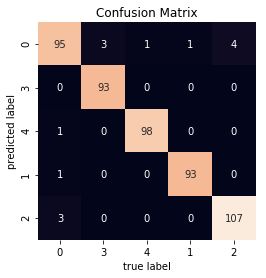

In [195]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

### Decision Tree

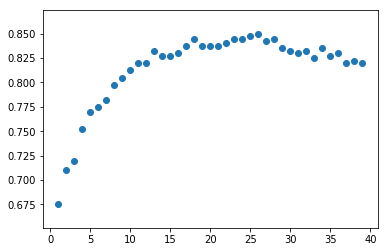

In [410]:
depthvec = []
scorevec = []
for i in range(1,40):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(test_data_df['category'], tree2.predict(np.stack(test_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

In [407]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=15,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
test_data_df['DT_predict'] = clf_tree.predict(np.stack(test_data_df['vect'], axis=0))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


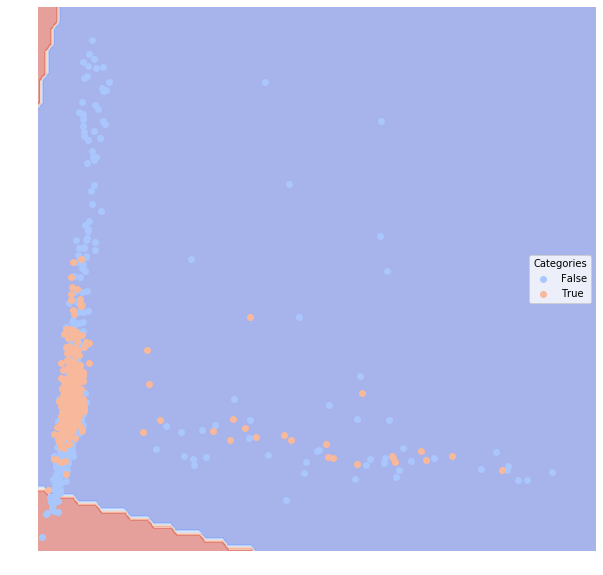

In [408]:
lucem_illud_2020.plotregions(clf_tree, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


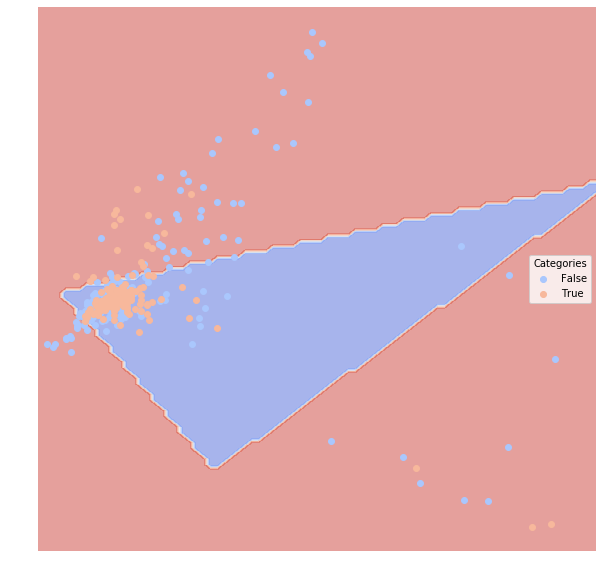

In [422]:
lucem_illud_2020.plotregions(clf_tree, test_data_df)

In [411]:
# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_data_df['category'], test_data_df['DT_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_data_df['category'], test_data_df['DT_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_data_df['category'], test_data_df['DT_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_data_df['category'], test_data_df['DT_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.8495671808952635
Recall:  0.8275
F measure: 0.8150671133394789
AUC: 0.7738631488631488


In [424]:
# Exrapolate codes from these models to all uncoded data

# store the predicted labels
uncoded_df['DT_predict'] = clf_tree.predict(np.stack(uncoded_df['vect'], axis=0))
uncoded_df.head()

,post,tags,tokenized_text,normalized_text,vect,lr_predict,nb_predict,DT_predict
5105,why don t we use <script src= xyz /> in html5...,html,"[why, don, t, we, use, <, script, src=, xyz, >...","[don, t, use, <, script, src=, xyz, >, html5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False
5106,what is the difference between pass by referen...,java,"[what, is, the, difference, between, pass, by,...","[difference, pass, reference, reference, diffe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False
5116,block call on sony ericsson phones im trying ...,android,"[block, call, on, sony, ericsson, phones, i, m...","[block, sony, ericsson, phones, m, try, write,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True
5117,problems accessing local and remote files on a...,android,"[problems, accessing, local, and, remote, file...","[problem, access, local, remote, file, android...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True
5120,after uploading to server images not showing i...,html,"[after, uploading, to, server, images, not, sh...","[upload, server, image, show, web, browser, ht...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False


<br><br>

### Random Forest

In [412]:
# build an ensemble classifier by bagging trees into a random forest
tree = sklearn.tree.DecisionTreeClassifier(max_depth=15) #Create an instance of our decision tree classifier.
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier
test_data_df['RF_predict'] = bag.predict(np.stack(test_data_df['vect'], axis=0))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


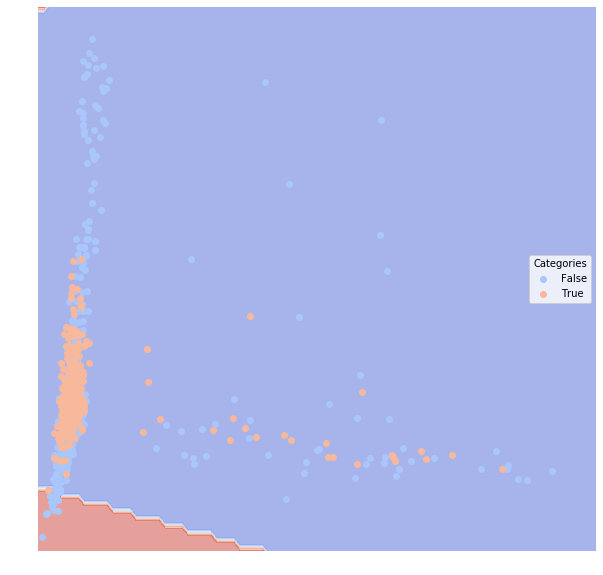

In [421]:
lucem_illud_2020.plotregions(bag, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


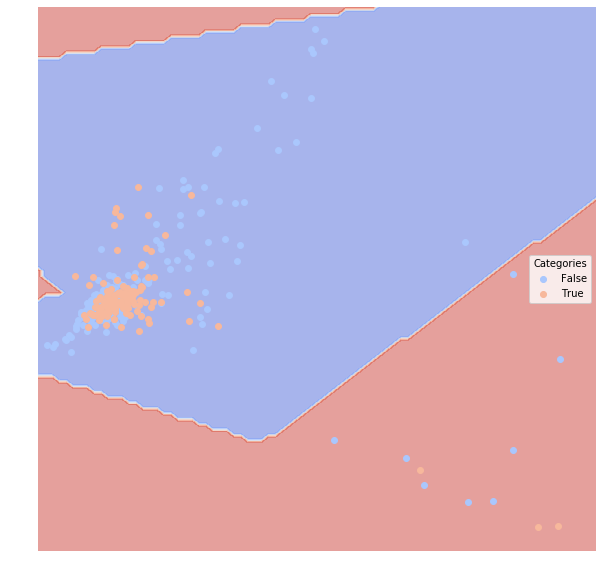

In [423]:
lucem_illud_2020.plotregions(bag, test_data_df)

In [419]:
# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_data_df['category'], test_data_df['RF_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_data_df['category'], test_data_df['RF_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_data_df['category'], test_data_df['RF_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_data_df['category'], test_data_df['RF_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.8514121863799283
Recall:  0.83
F measure: 0.8180579562785968
AUC: 0.7772415272415273


The decision tree and random forest methods perform even worse than the logistic regression and naive bayes methods, though the ensemble method (random forest) perform slightly better than decision tree. 
<br>
Ensemble method combines multiple models in order to increase predictive performance. Prominent approaches include boosting, bagging and stacking.
<br>

In [425]:
# Exrapolate codes from these models to all uncoded data

# store the predicted labels
uncoded_df['RF_predict'] = bag.predict(np.stack(uncoded_df['vect'], axis=0))
uncoded_df.head()

,post,tags,tokenized_text,normalized_text,vect,lr_predict,nb_predict,DT_predict,RF_predict
5105,why don t we use <script src= xyz /> in html5...,html,"[why, don, t, we, use, <, script, src=, xyz, >...","[don, t, use, <, script, src=, xyz, >, html5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False
5106,what is the difference between pass by referen...,java,"[what, is, the, difference, between, pass, by,...","[difference, pass, reference, reference, diffe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False
5116,block call on sony ericsson phones im trying ...,android,"[block, call, on, sony, ericsson, phones, i, m...","[block, sony, ericsson, phones, m, try, write,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,False
5117,problems accessing local and remote files on a...,android,"[problems, accessing, local, and, remote, file...","[problem, access, local, remote, file, android...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True
5120,after uploading to server images not showing i...,html,"[after, uploading, to, server, images, not, sh...","[upload, server, image, show, web, browser, ht...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False


<br><br><br>

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [196]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, better..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[m, sorry, read, commandment]"


Make a testing and training set:

In [197]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [198]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [199]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [200]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [201]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.243761,0.593024,0.708609,0.375204,0.221532
talk.religion.misc,0.360998,0.603940,0.251534,0.216199,0.550336
sci.space,0.318050,0.565403,0.407303,0.318118,0.300830
comp.graphics,0.276262,0.683020,0.485816,0.397328,0.595652


And lets look at the testing data

In [202]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.24651162790697675


Let's produce another confusion matrix:

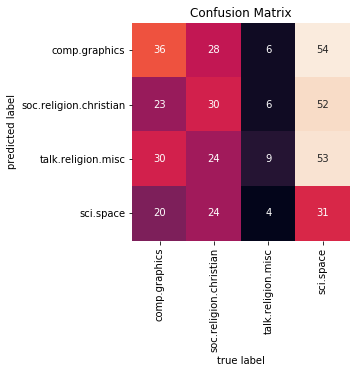

In [203]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [420]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])
test_data_df['knn_predict'] = clf_knearest.predict(np.stack(test_data_df['vect'], axis=0))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


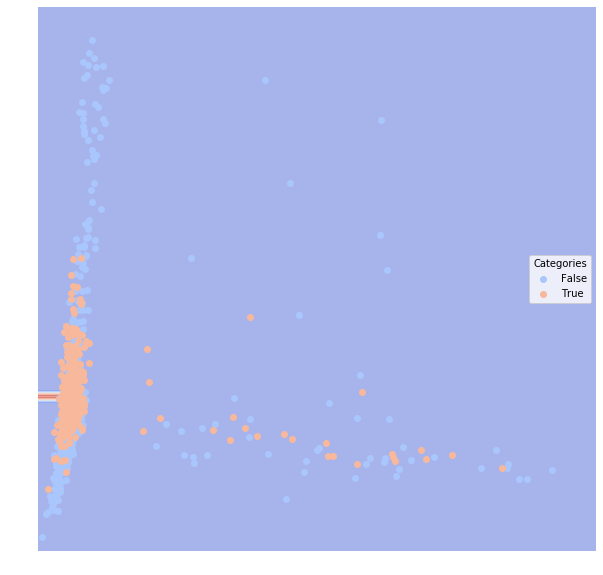

In [426]:
lucem_illud_2020.plotregions(clf_knearest, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


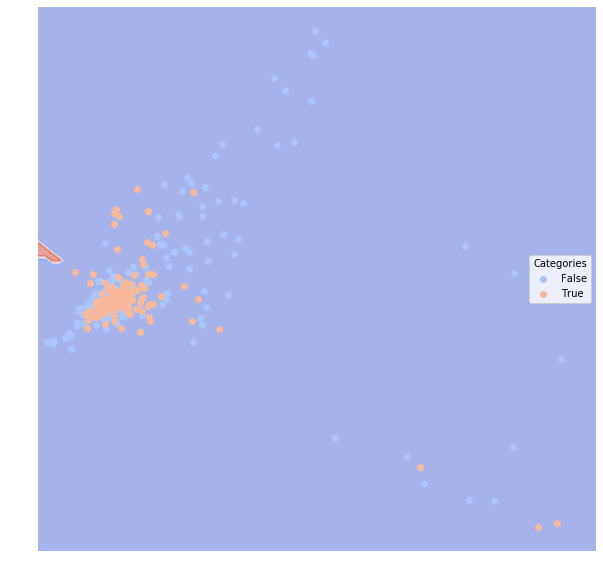

In [427]:
lucem_illud_2020.plotregions(clf_knearest, test_data_df)

In [428]:
# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_data_df['category'], test_data_df['knn_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_data_df['category'], test_data_df['knn_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_data_df['category'], test_data_df['knn_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_data_df['category'], test_data_df['knn_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.8671900451204632
Recall:  0.8675
F measure: 0.8656249699021044
AUC: 0.8460424710424711


In [429]:
# Exrapolate codes from these models to all uncoded data

# store the predicted labels
uncoded_df['KNN_predict'] = bag.predict(np.stack(uncoded_df['vect'], axis=0))
uncoded_df.head()

,post,tags,tokenized_text,normalized_text,vect,lr_predict,nb_predict,DT_predict,RF_predict,KNN_predict
5105,why don t we use <script src= xyz /> in html5...,html,"[why, don, t, we, use, <, script, src=, xyz, >...","[don, t, use, <, script, src=, xyz, >, html5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,False
5106,what is the difference between pass by referen...,java,"[what, is, the, difference, between, pass, by,...","[difference, pass, reference, reference, diffe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,False
5116,block call on sony ericsson phones im trying ...,android,"[block, call, on, sony, ericsson, phones, i, m...","[block, sony, ericsson, phones, m, try, write,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,False,False
5117,problems accessing local and remote files on a...,android,"[problems, accessing, local, and, remote, file...","[problem, access, local, remote, file, android...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,True,True,True,True
5120,after uploading to server images not showing i...,html,"[after, uploading, to, server, images, not, sh...","[upload, server, image, show, web, browser, ht...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,False,False


Both k-nearest neighbor approach and k-means clustering are similarity-based learning. However, K-nearest neighbor is a supervised learning method that serves to classify new, unlabelled data based on a model trained on labelled data. K-means clustering, on the other hand, is an unsupervised learning method used to gradually learn how to cluster the unlabelled points into group.

<br><br><br>

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [204]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [205]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [206]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [207]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [208]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Bad Roommates: Tales of Irritation,0.028213,0.961073,0.950617,0.908327,0.939024
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.984087,0.985915,0.964799,0.972222
Relationships,0.015674,0.975108,0.988235,0.955855,0.954545
Tales From Tech Support,0.021944,0.981110,0.926829,0.917927,0.987013


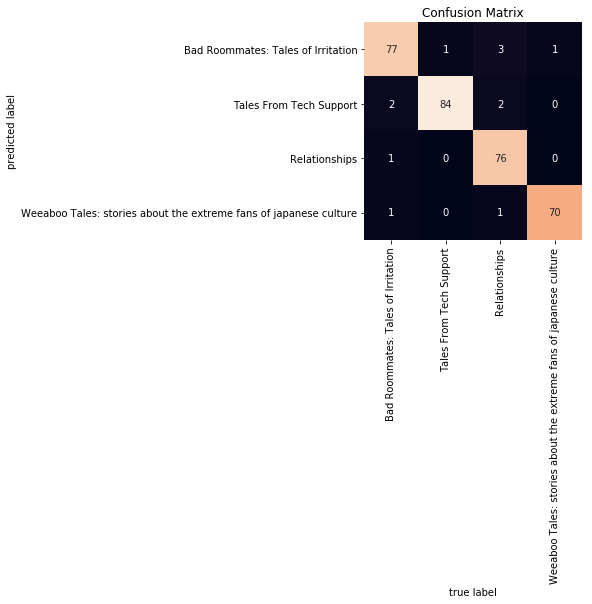

In [209]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

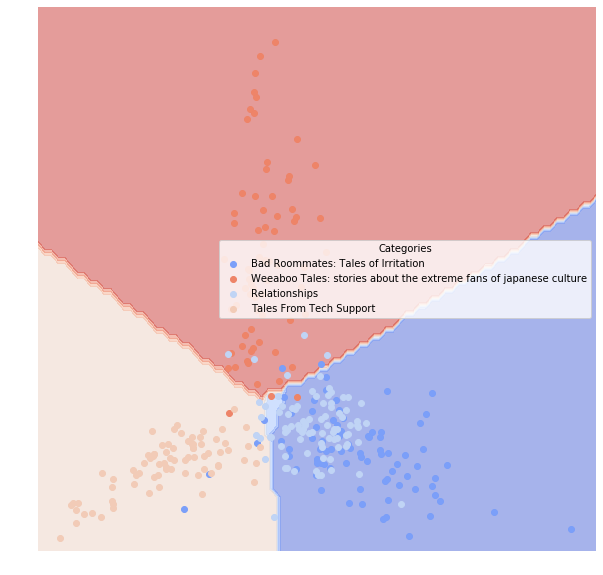

In [210]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [211]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [212]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Bad Roommates: Tales of Irritation,0.040752,0.944659,0.925926,0.868827,0.914634
Weeaboo Tales: stories about the extreme fans of japanese culture,0.015674,0.975118,0.971831,0.940742,0.958333
Relationships,0.034483,0.951569,0.952941,0.899083,0.920455
Tales From Tech Support,0.015674,0.989669,0.939024,0.939024,1.000000


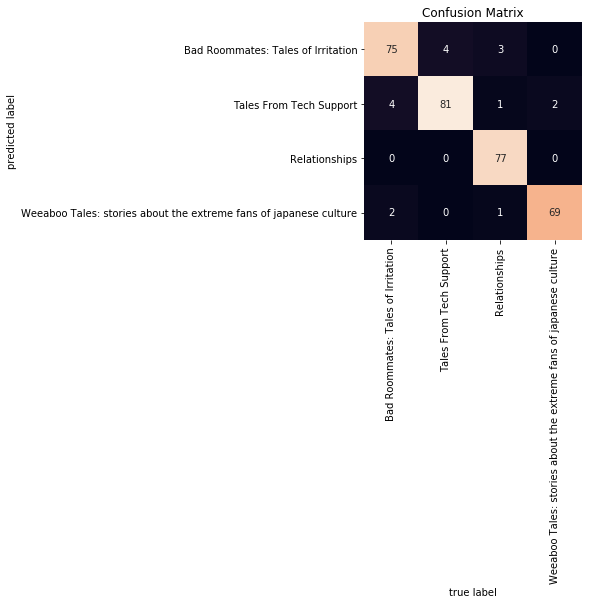

In [213]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

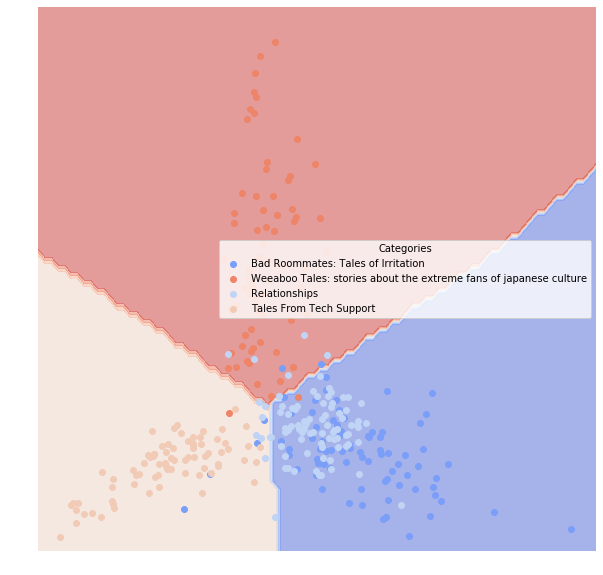

In [214]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [430]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
test_data_df['nn_predict'] = clf_nn.predict(np.stack(test_data_df['vect'], axis=0))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [432]:
# Calculate precision, recall, the F-measure, and AUC
print("Precision:", sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nn_predict'], average = 'weighted')) #precision
print("Recall: ", sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nn_predict'], average = 'weighted')) #recall
print("F measure:", sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nn_predict'], average = 'weighted')) #F-1 measure
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_data_df['category'], test_data_df['nn_predict'])
print("AUC:", sklearn.metrics.auc(fpr, tpr)) #AUC

Precision: 0.9173958753461859
Recall:  0.9175
F measure: 0.9174418526598422
AUC: 0.9108215358215358


Neural network model performs better than k-nearest neighbor, Naive Bayes, logistic and decision-tree approaches, as it has higher F1 measure, AUC, precision and recall (all above 0.9) than that of the rest models. As we can see in the previous sections the classes distributed in a highly mixed-up manner, so it is a very complciated and difficult classification task, for which neural network could perfom better due to its iterative transformations. 